<a href="https://colab.research.google.com/github/Bisma-Shafiq/Machine-Learning-Tensorflow/blob/main/Tensorflow_CNN_Project_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets  download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [26]:
# apply Generators(in keras it convert data into batches)

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [27]:
# normalize data

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [46]:
# CNN Model
from keras.layers import MaxPooling2D, BatchNormalization, Dropout
model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", input_shape=(256,256,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3), padding="valid", input_shape=(256,256,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3), padding="valid", input_shape=(256,256,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [48]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 83ms/step - accuracy: 0.5267 - loss: 4.5178 - val_accuracy: 0.5654 - val_loss: 0.7239
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.5503 - loss: 0.7191 - val_accuracy: 0.6470 - val_loss: 0.6288
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6233 - loss: 0.6471 - val_accuracy: 0.5414 - val_loss: 0.6848
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6525 - loss: 0.6208 - val_accuracy: 0.7212 - val_loss: 0.5467
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7184 - loss: 0.5415 - val_accuracy: 0.7678 - val_loss: 0.5123
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7607 - loss: 0.4967 - val_accuracy: 0.7366 - val_loss: 0.5126
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7807 - loss: 0.4574 - val_accuracy: 0.7774 - val_loss: 0.4631
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8064 - loss: 0.4169 - 

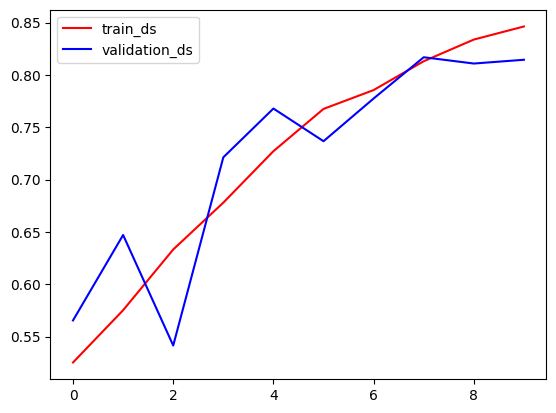

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train_ds')
plt.plot(history.history['val_accuracy'],color='blue',label='validation_ds')
plt.legend()
plt.show()

In [51]:
import cv2
test_img = cv2.imread('/content/cat.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [52]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step


array([[0.]], dtype=float32)